In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable

In [28]:
df = pd.read_csv('../output/convergent.csv')

In [30]:
df

,regionbase,tax_sce,region_scenario,pe,tb,varphi,jxbar_prime,jmbar_prime,j0_prime,Qe_prime,...,leakage2,leakage3,chg_extraction,chg_production,chg_consumption,chg_Qeworld,pai_g,subsidy_ratio,welfare,welfare_noexternality
0,OECD37 as Home,Unilateral,3,1.000000,0.000000,0.0,0.049234,0.819498,0.049234,8.625495,...,0.033333,0.323333,0.000000,1.000000e-07,9.700000e-07,-0.000003,0.000000,0.000000,-4.317474e-07,-4.317474e-07
1,OECD37 as Home,Unilateral,3,0.993667,0.039981,0.1,0.049253,0.819498,0.048138,8.334422,...,0.084004,0.225309,-0.075012,3.075279e-02,8.248284e-02,-0.366088,-0.204258,0.005999,1.992536e-02,-1.992110e-02
2,OECD37 as Home,Unilateral,3,0.988369,0.079572,0.2,0.049307,0.819498,0.047105,8.035798,...,0.065028,0.204957,-0.137945,4.731719e-02,1.491358e-01,-0.727645,-0.412435,0.011932,7.957643e-02,-7.882309e-02
3,OECD37 as Home,Unilateral,3,0.984046,0.118887,0.3,0.049394,0.819498,0.046128,7.729005,...,0.045979,0.184435,-0.189416,4.992940e-02,2.002801e-01,-1.085909,-0.624856,0.017800,1.782903e-01,-1.762933e-01
4,OECD37 as Home,Unilateral,3,0.980653,0.158018,0.4,0.049511,0.819498,0.045204,7.413262,...,0.026879,0.163754,-0.229903,3.876288e-02,2.361562e-01,-1.442139,-0.841802,0.023600,3.158152e-01,-3.120568e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,OECD37 as Home,Unilateral,3,0.001272,350.504976,975.0,1.000000,0.819498,0.000028,0.000000,...,-0.638344,-0.562811,-22.806878,-2.006466e+01,-1.769049e+01,-31.432376,-2121.686932,0.999976,3.178852e+04,-1.568393e+03
589,OECD37 as Home,Unilateral,3,0.001264,352.256496,980.0,1.000000,0.819498,0.000028,0.000000,...,-0.638288,-0.562844,-22.809676,-2.006469e+01,-1.769309e+01,-31.435174,-2132.319529,0.999976,3.195959e+04,-1.571370e+03
590,OECD37 as Home,Unilateral,3,0.001256,354.007875,985.0,1.000000,0.819498,0.000028,0.000000,...,-0.638233,-0.562876,-22.812450,-2.006473e+01,-1.769567e+01,-31.437948,-2142.951271,0.999976,3.213068e+04,-1.574336e+03
591,OECD37 as Home,Unilateral,3,0.001247,355.759096,990.0,1.000000,0.819498,0.000028,0.000000,...,-0.638178,-0.562908,-22.815201,-2.006476e+01,-1.769823e+01,-31.440699,-2153.582053,0.999977,3.230177e+04,-1.577293e+03


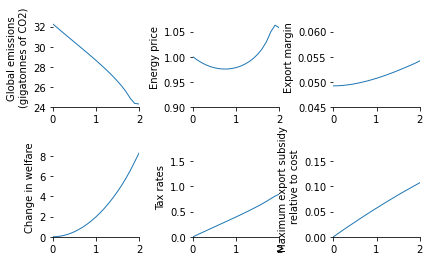

In [31]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

ax1.set_ylim(24, 34)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.045, 0.065)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.045, 0.050, 0.055, 0.060])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

#plt.savefig('../plots/fig1_new.pdf', format='PDF')

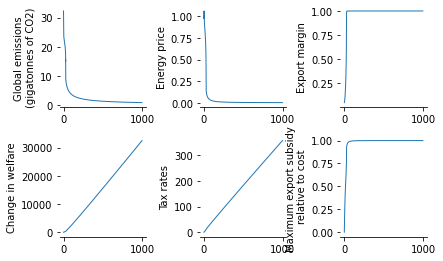

In [32]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    #ax.set_xlim(0,20)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)


#plt.savefig('../plots/fig1_big.pdf', format='PDF')

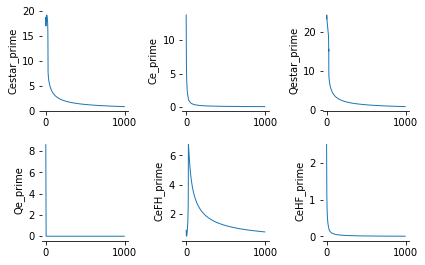

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    #ax.set_xlim(0,10)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Cestar_prime')
ax2.set_ylabel('Ce_prime')
ax3.set_ylabel('Qestar_prime')
ax4.set_ylabel('Qe_prime')
ax5.set_ylabel('CeFH_prime')
ax6.set_ylabel('CeHF_prime')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Cestar_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['Ce_prime'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['Qestar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['Qe_prime'], color='C0',linewidth=1)
#ax5.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['CeFH_prime'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['CeHF_prime'], color='C0',linewidth=1)


#plt.savefig('../plots/fig1_othervar.pdf', format='PDF')

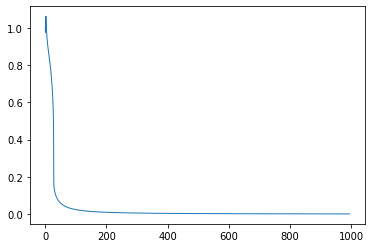

In [24]:
plt.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)

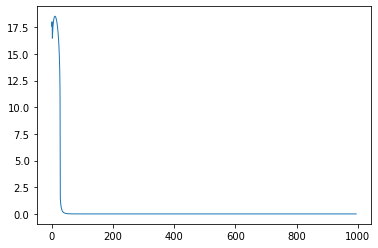

In [25]:
plt.plot(df1['varphi'],df1['CeFF_prime'], color='C0',linewidth=1)

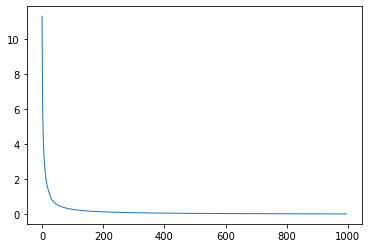

In [26]:
plt.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)

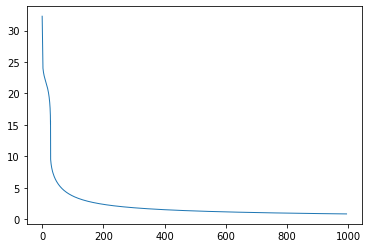

In [34]:
plt.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)